**Problem 1**

1. Solve the following ODE using a first-order Forward Euler approximation. Write out the matrix form of the solution. Find the eigenvalues of the matrix. What do you notice about the eigenvalues? Try varying values of $\Delta t$. When does the solution become unstable? Why?

$$\frac{dy}{dt} = -30y, y(0) = 1 $$

2. Repeat 1. using a second-, third-, fourth-, fifth-, and sixth- order approximation for the derivative. What do you notice about the behavior of higher order approximations as you vary $\Delta t$? Do they become unstable?

3. Plot the relative accuracy of y(0.3) for each case in 1 and 2 as a function of $\Delta t$, as well as the time of execution as a function of $\Delta t$. At what point does using a higher order approximation lose its value, in terms of both accuracy and computational cost?

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [47]:
# Define the discretization
N = 40 # Number of steps
t = np.linspace(0, 1, N+1) # Define time vector
dt = t[1] # Define delta t
y0 = 1 # Define initial condition

b = 0*t # Define b vector
b[0] = y0 # Set initial condition

In [48]:
A = np.eye(N=N+1)/dt + (30 - 1/dt)*np.eye(N=N+1, k=-1)
A[0,0] = 1

# Second order A matrix
A2 = 2*np.eye(N=N+1, k=0)/dt + (30 - 1.5/dt)*np.eye(N=N+1, k=-1) + (-0.5/dt)*np.eye(N=N+1, k=1)
#A[0,0] = 1
A2[0:2,:] = A[0:2,:]

y1 = np.matmul(np.linalg.inv(A), b)
y2 = np.matmul(np.linalg.inv(A2), b)

In [49]:
A2 = 2*np.eye(N=N+1, k=0)/dt + (30 - 1.5/dt)*np.eye(N=N+1, k=-1) + (-0.5/dt)*np.eye(N=N+1, k=1)
A2[0:2,:] = A[0:2,:]
A2

array([[  1.,   0.,   0., ...,   0.,   0.,   0.],
       [-10.,  40.,   0., ...,   0.,   0.,   0.],
       [  0., -30.,  80., ...,   0.,   0.,   0.],
       ...,
       [  0.,   0.,   0., ...,  80., -20.,   0.],
       [  0.,   0.,   0., ..., -30.,  80., -20.],
       [  0.,   0.,   0., ...,   0., -30.,  80.]])

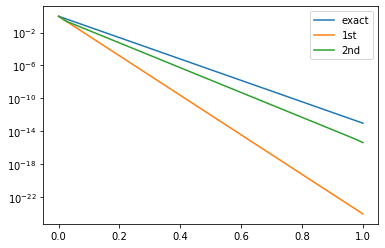

In [50]:
y = np.exp(-30*t)

fig, ax = plt.subplots(figsize=(6, 4))

ax.semilogy(t, y, label='exact')
ax.semilogy(t, y1, label='1st')
ax.semilogy(t, y2, label='2nd')

ax.legend()